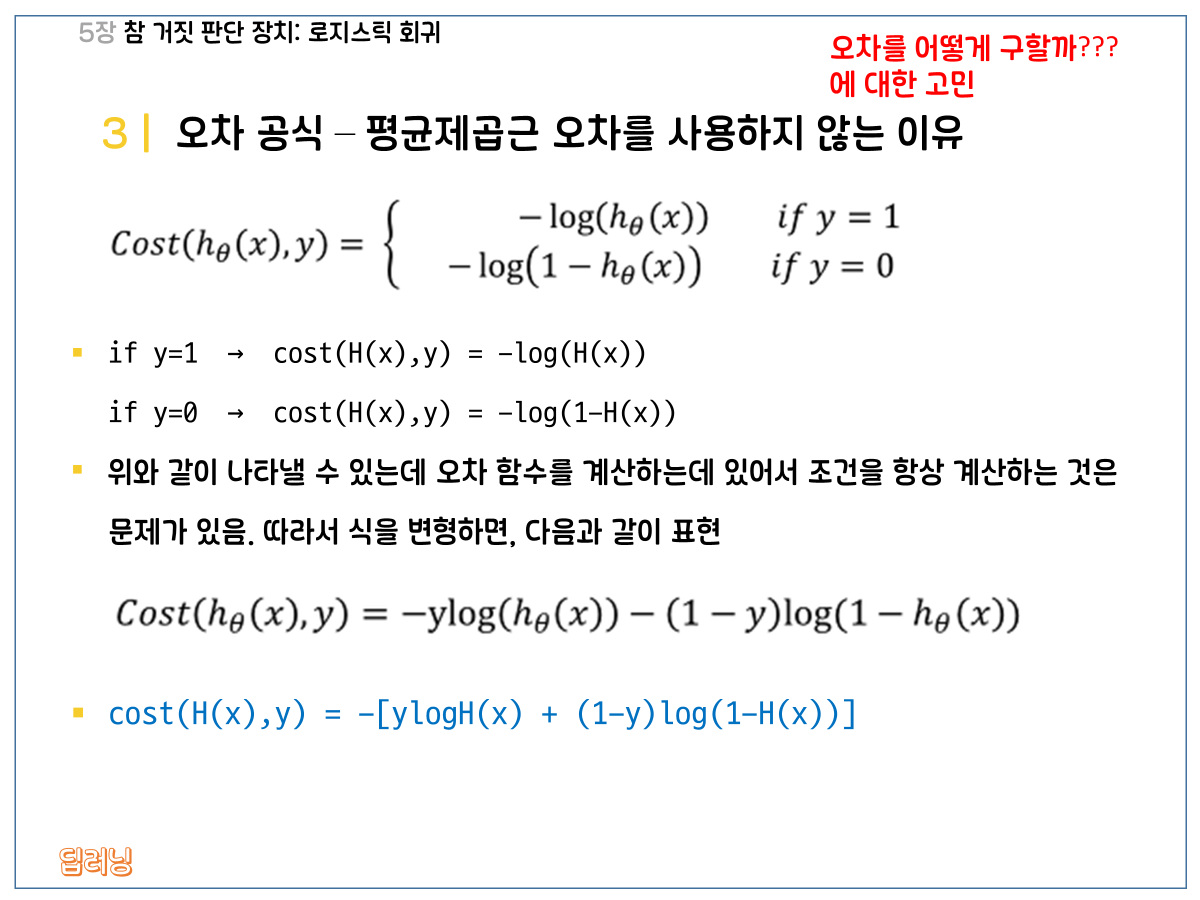

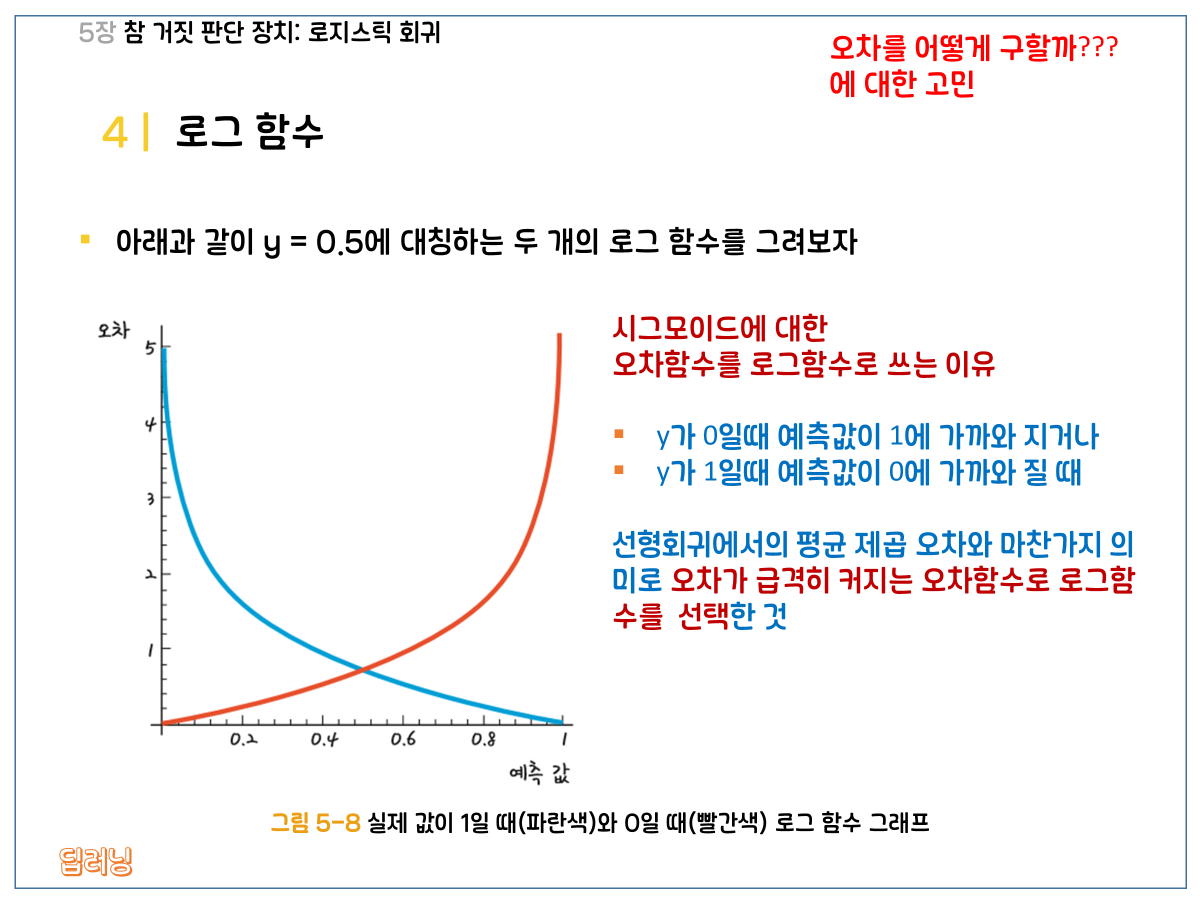

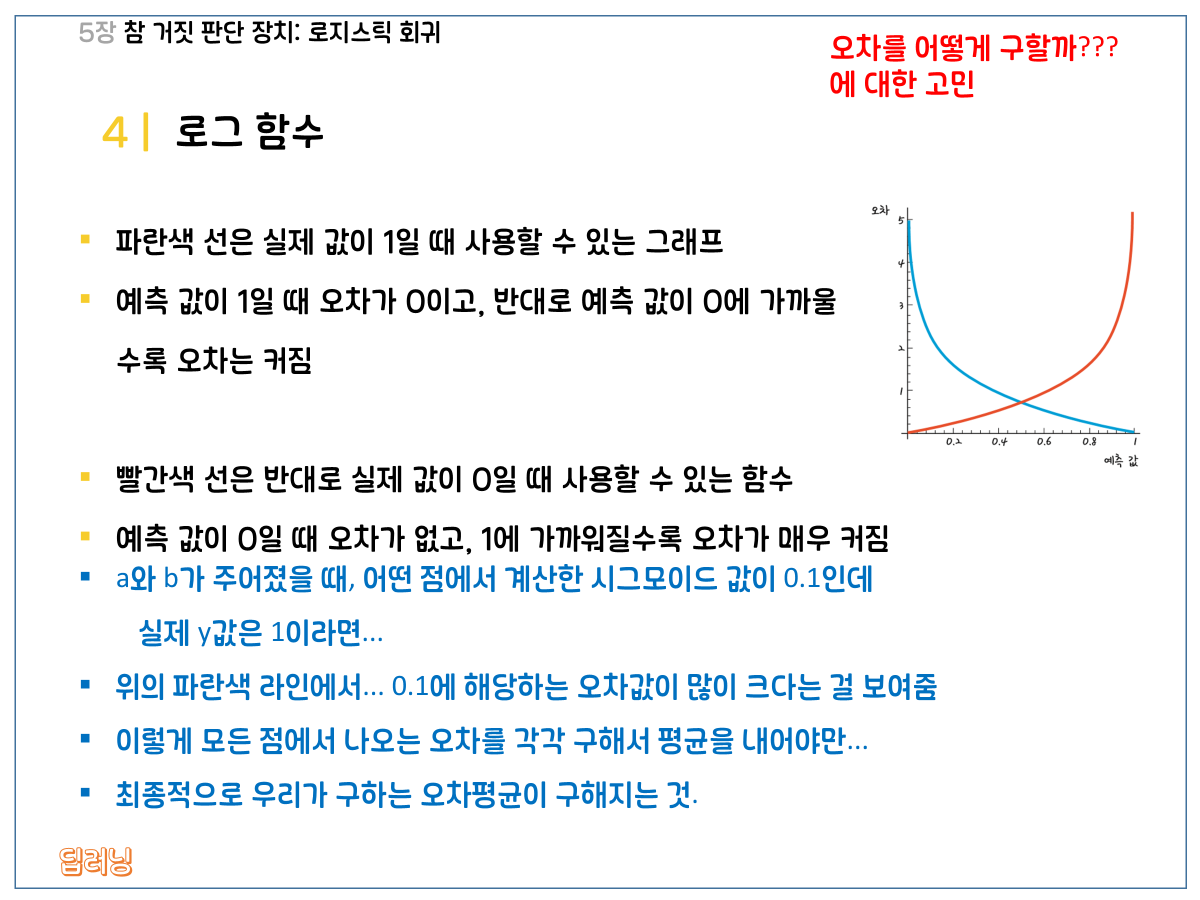

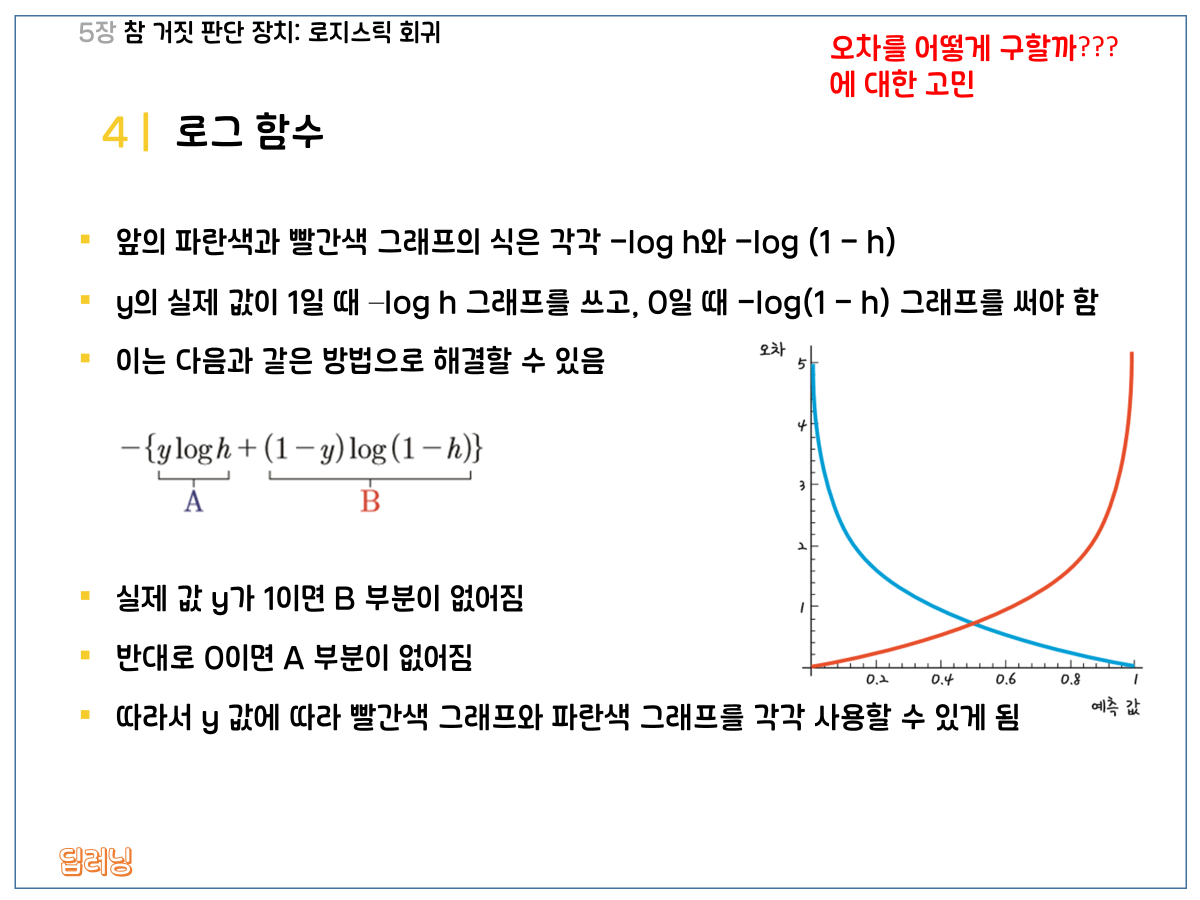

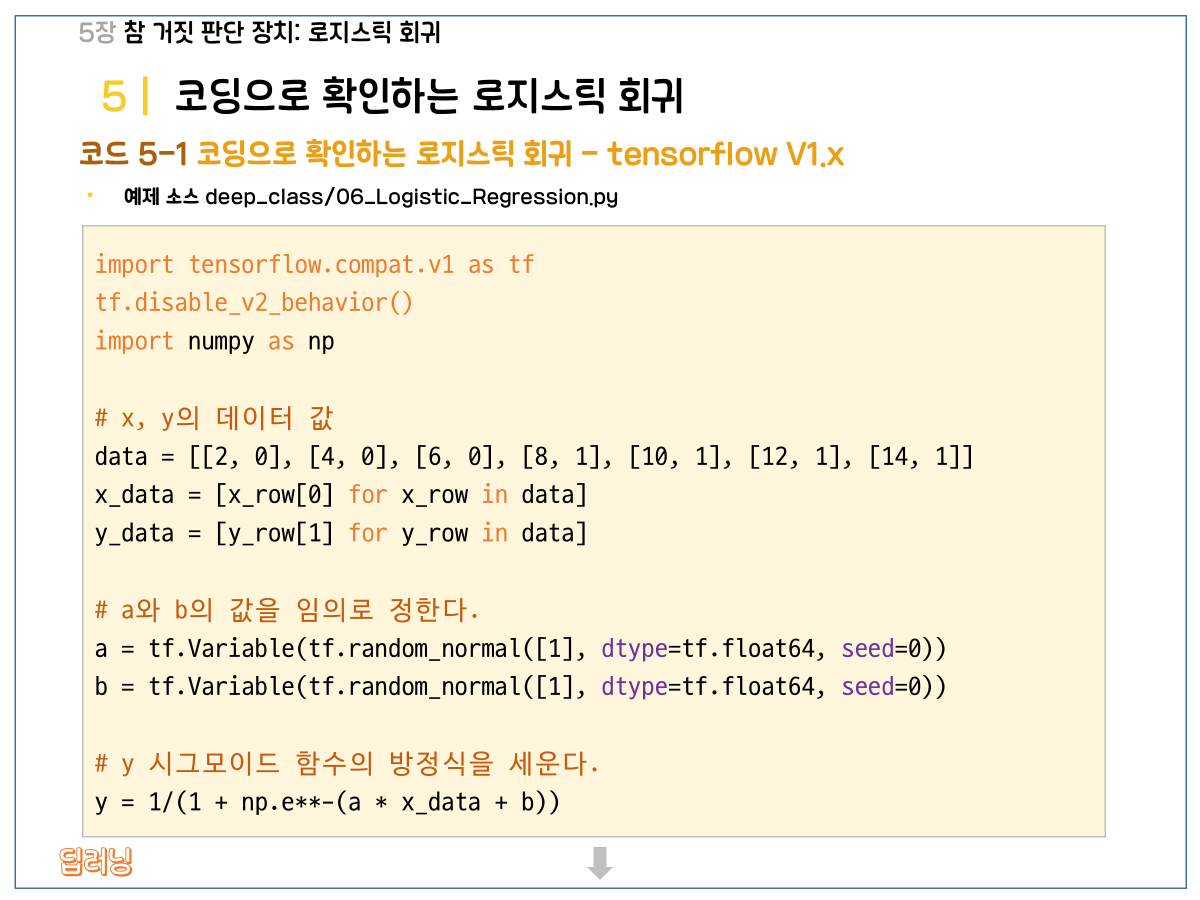

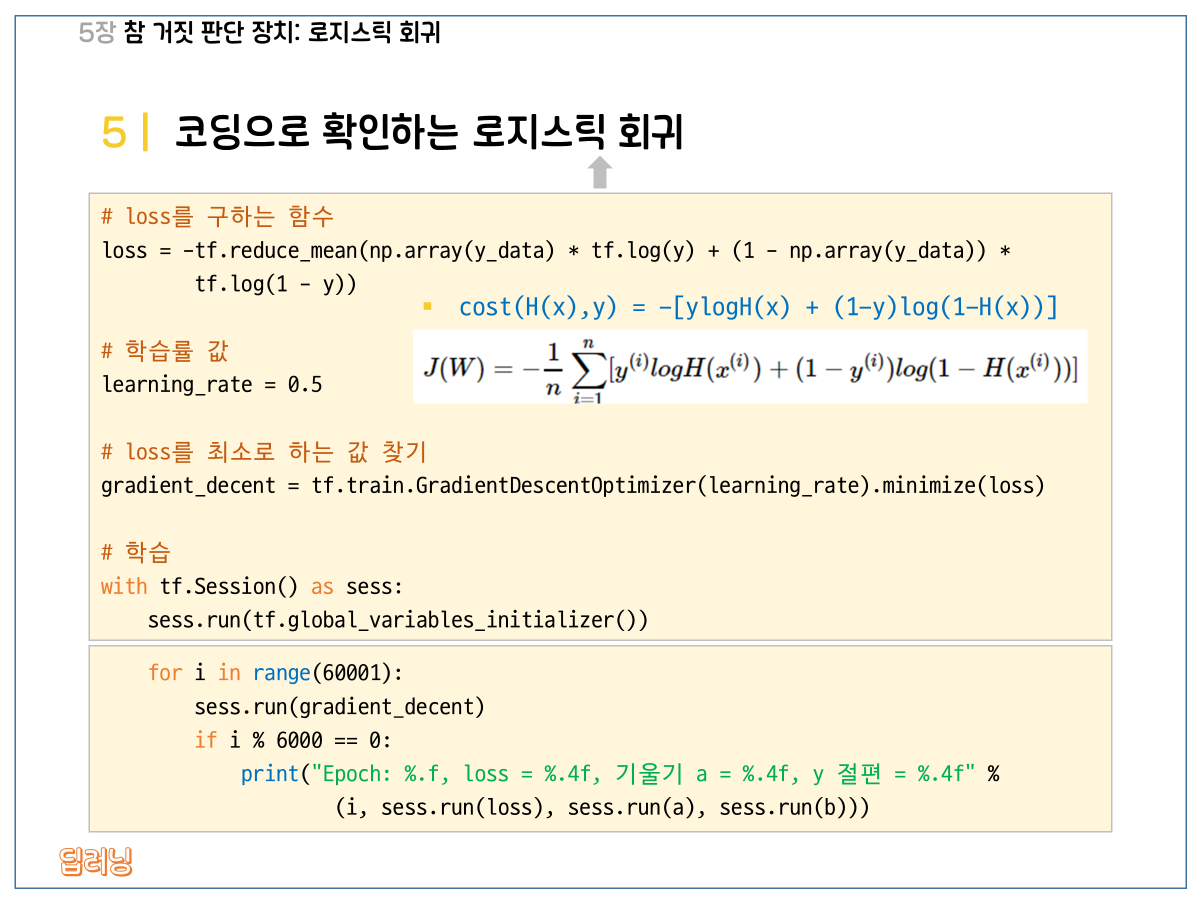

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random_uniform([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64, seed=0))

y = 1/(1 + np.e**-(a * x_data + b))

loss = -tf.reduce_mean(np.array(y_data) * tf.log(y) + (1 - np.array(y_data)) * tf.log(1-y))

learning_rate = 0.5

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        if i % 6000 == 0:
            print("Epoch : %.f, loss = %.4f, 기울기 a = %.4f, y 절편 = %.4f" % (i, sess.run(loss), sess.run(a), sess.run(b)))

    calc_a = sess.run(a)
    calc_b = sess.run(b)

    # new_x_data = 5
    # y_test = 1/(1 + np.e**-(a * new_x_data + b))
    # print(sess.run(y_test))
    # print(sess.run(y_test[0]))

    # new_x_data = 7
    # y_test = 1/(1 + np.e**-(a * new_x_data + b))
    # print(sess.run(y_test))
    # print(sess.run(y_test[0]))

    # new_x_data = 13
    # y_test = 1/(1 + np.e**-(a * new_x_data + b))
    # print(sess.run(y_test))
    # print(sess.run(y_test[0]))

def NewDataCalc(new_x_data):
    return 1/(1 + np.e**-(calc_a * new_x_data + calc_b))

print(NewDataCalc(5))
print(NewDataCalc(7))
print(NewDataCalc(13))

<ipython-input-4-2ab334aa6dae>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epoch : %.f, loss = %.4f, 기울기 a = %.4f, y 절편 = %.4f" % (i, sess.run(loss), sess.run(a), sess.run(b)))


Epoch : 0, loss = 0.7394, 기울기 a = -0.0316, y 절편 = 0.6000
Epoch : 6000, loss = 0.0152, 기울기 a = 2.9210, y 절편 = -20.2978
Epoch : 12000, loss = 0.0081, 기울기 a = 3.5637, y 절편 = -24.8008
Epoch : 18000, loss = 0.0055, 기울기 a = 3.9557, y 절편 = -27.5462
Epoch : 24000, loss = 0.0041, 기울기 a = 4.2380, y 절편 = -29.5230
Epoch : 30000, loss = 0.0033, 기울기 a = 4.4586, y 절편 = -31.0675
Epoch : 36000, loss = 0.0028, 기울기 a = 4.6396, y 절편 = -32.3345
Epoch : 42000, loss = 0.0024, 기울기 a = 4.7930, y 절편 = -33.4086
Epoch : 48000, loss = 0.0021, 기울기 a = 4.9261, y 절편 = -34.3405
Epoch : 54000, loss = 0.0019, 기울기 a = 5.0436, y 절편 = -35.1636
Epoch : 60000, loss = 0.0017, 기울기 a = 5.1489, y 절편 = -35.9004
[3.88404392e-05]
[0.53537991]
[1.]


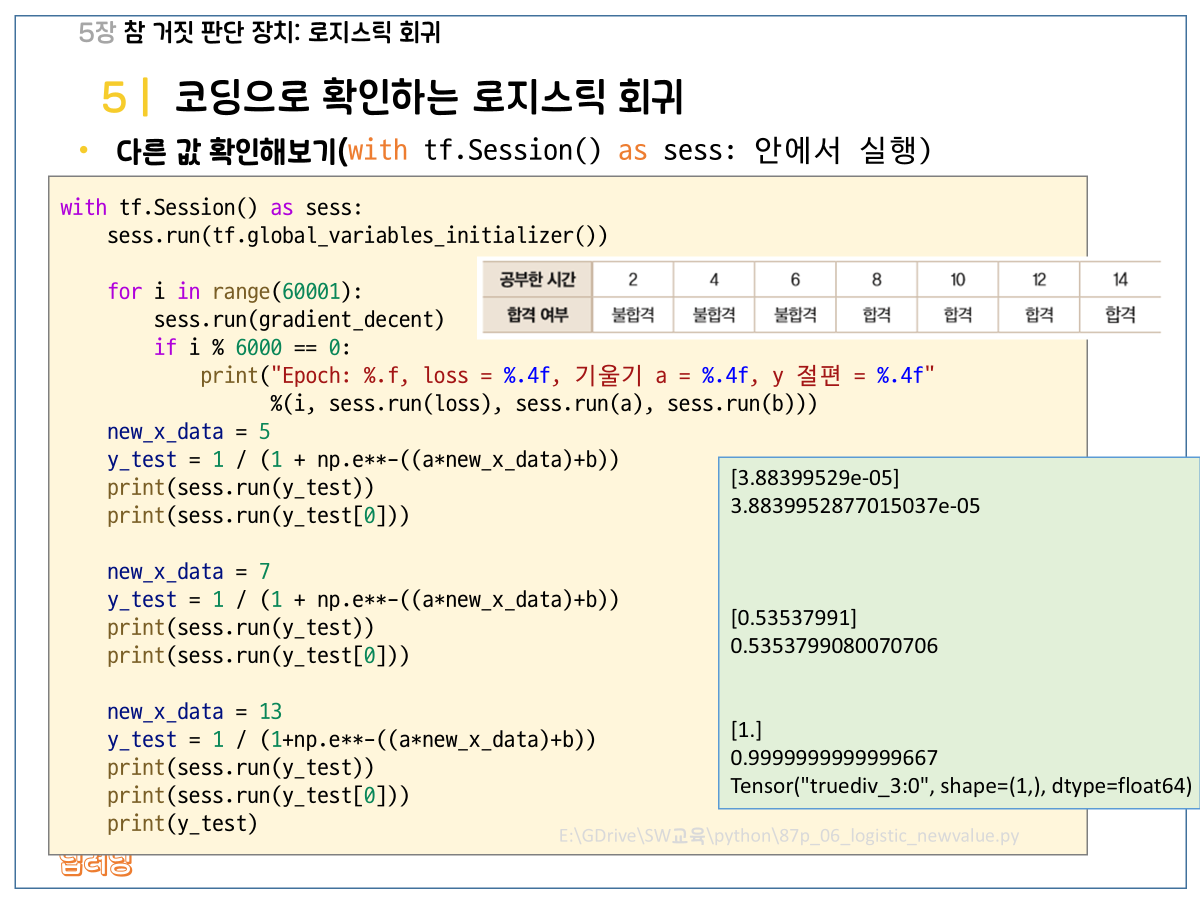

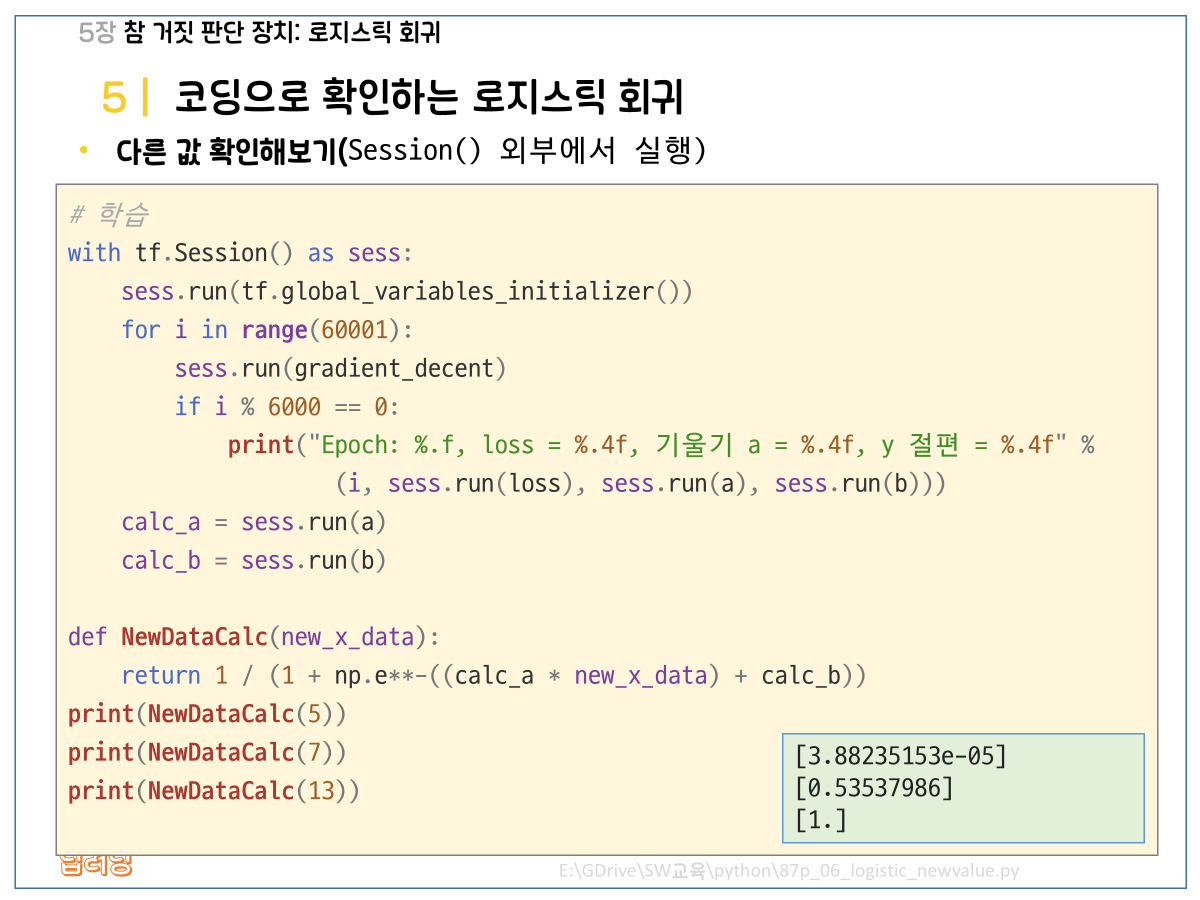

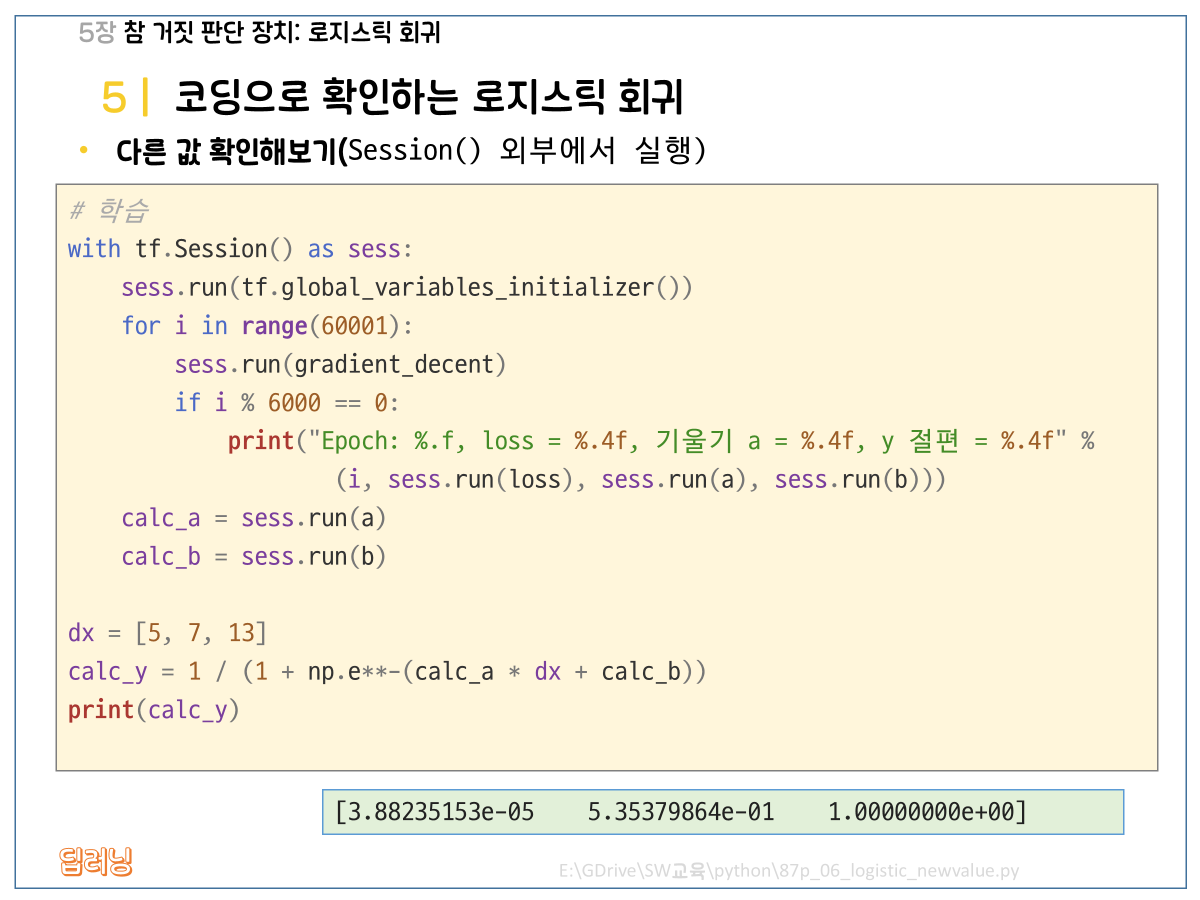

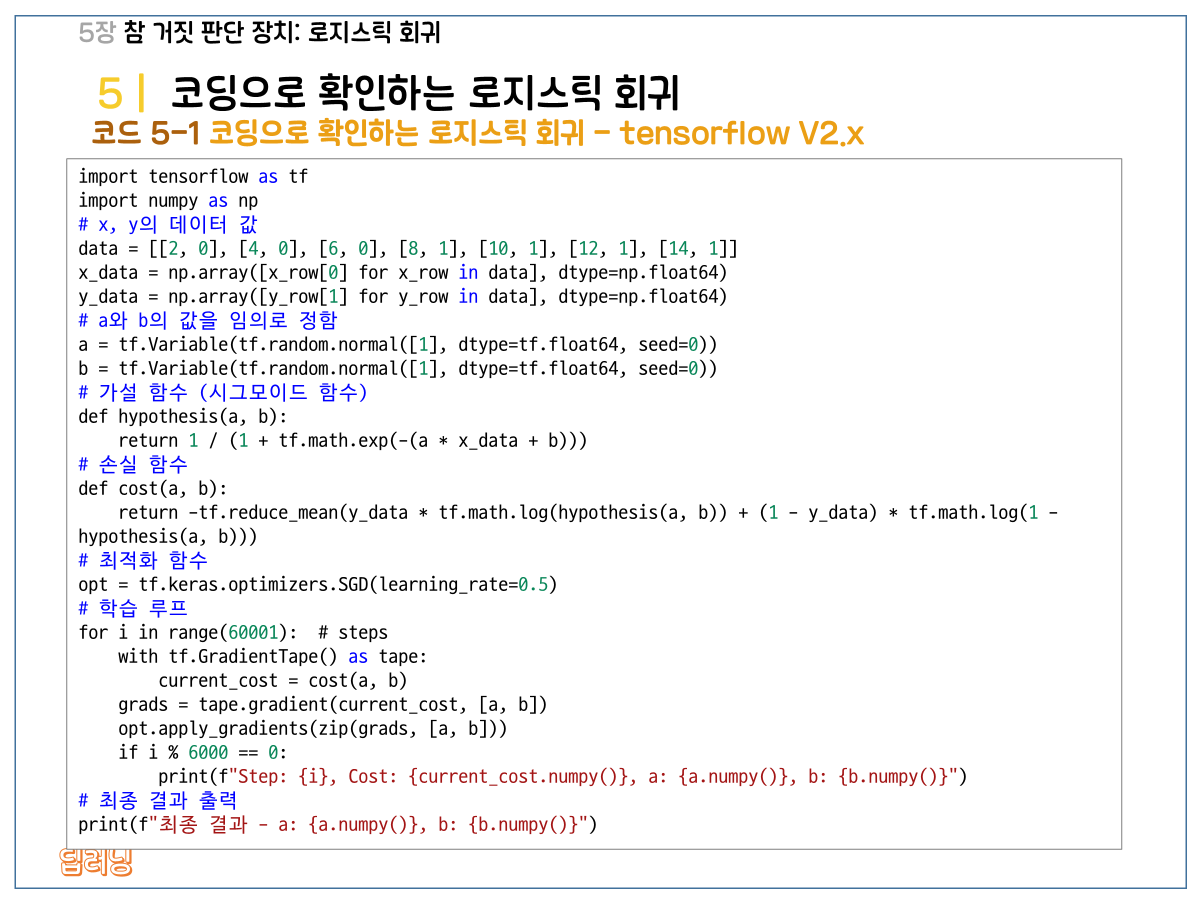

In [4]:
import tensorflow as tf
import numpy as np

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random.uniform([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random.uniform([1], dtype=tf.float64, seed=0))

def hypothesis(a, b):
    return 1/(1 + np.e**-(a * x_data + b))

def cost(a, b):
    return -tf.reduce_mean(np.array(y_data) * tf.math.log(hypothesis(a, b)) + (1 - np.array(y_data)) * tf.math.log(1-hypothesis(a, b)))

opt = tf.keras.optimizers.SGD(learning_rate=0.5)

for i in range(60001):
    with tf.GradientTape() as tape:
        current_cost = cost(a, b)
    grads = tape.gradient(current_cost, [a, b])
    opt.apply_gradients(zip(grads, [a, b]))
    if i % 6000 == 0:
        print(f'Step : {i}, Cost : {current_cost.numpy()}, a : {a.numpy()}, b : {b.numpy()}')

print(f'최종 결과 - a : {a.numpy()}, b " {b.numpy()}')

new_x_data = 5
y_test = 1/(1 + np.e**-(a * new_x_data + b))
print(y_test.numpy())
print("%.40f", float(y_test.numpy()))

new_x_data = 7
y_test = 1/(1 + np.e**-(a * new_x_data + b))
print(y_test.numpy())
print("%.40f", float(y_test.numpy()))

new_x_data = 13
y_test = 1/(1 + np.e**-(a * new_x_data + b))
print(y_test.numpy())
print("%.40f", float(y_test.numpy()))

Step : 0, Cost : 0.7010889312102455, a : [-0.06785088], b : [0.6983842]
Step : 6000, Cost : 0.015201184065375947, a : [2.92067549], b : [-20.29527683]
Step : 12000, Cost : 0.008072242361796943, a : [3.56351937], b : [-24.7994616]
Step : 18000, Cost : 0.0054758733887061055, a : [3.95557269], b : [-27.54526683]
Step : 24000, Cost : 0.004137677974667118, a : [4.23790937], b : [-29.52233687]
Step : 30000, Cost : 0.0033229601976152087, a : [4.45850169], b : [-31.06690926]
Step : 36000, Cost : 0.0027753183777175817, a : [4.63948483], b : [-32.33407437]
Step : 42000, Cost : 0.0023821324150578725, a : [4.79289983], b : [-33.40818091]
Step : 48000, Cost : 0.002086235495484479, a : [4.92602306], b : [-34.34019437]
Step : 54000, Cost : 0.0018555465559682435, a : [5.04358733], b : [-35.16326125]
Step : 60000, Cost : 0.0016706795423140496, a : [5.1488435], b : [-35.9001479]
최종 결과 - a : [5.1488435], b " [-35.9001479]


In [10]:
import numpy as np

a = np.arange(12)
print(a)

b = a.reshape(3,4)
print(b)

c = a.reshape(3, -1)
print(c)

d = a.reshape(2, 2, -1)
print(d)

e = a.flatten()
print(e)

f = a.ravel()
print(f)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


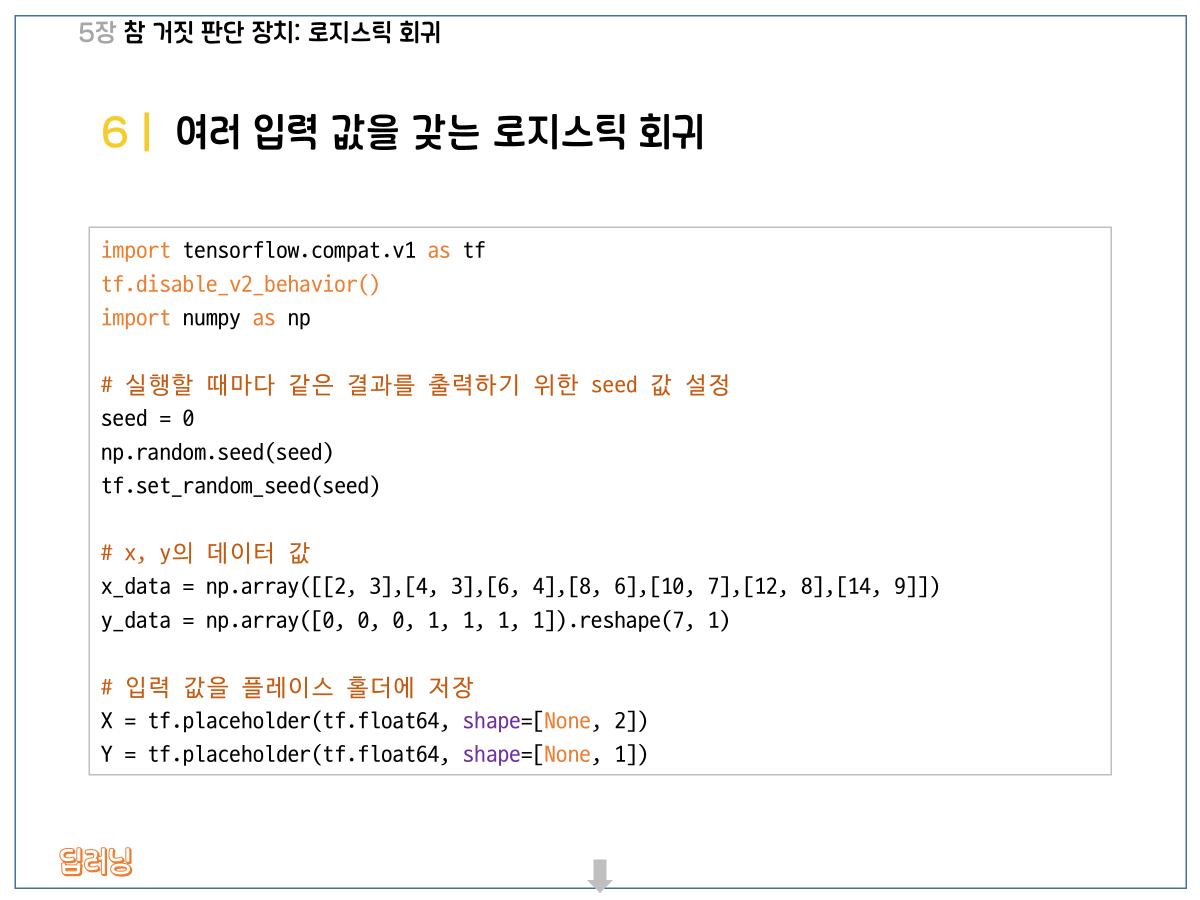

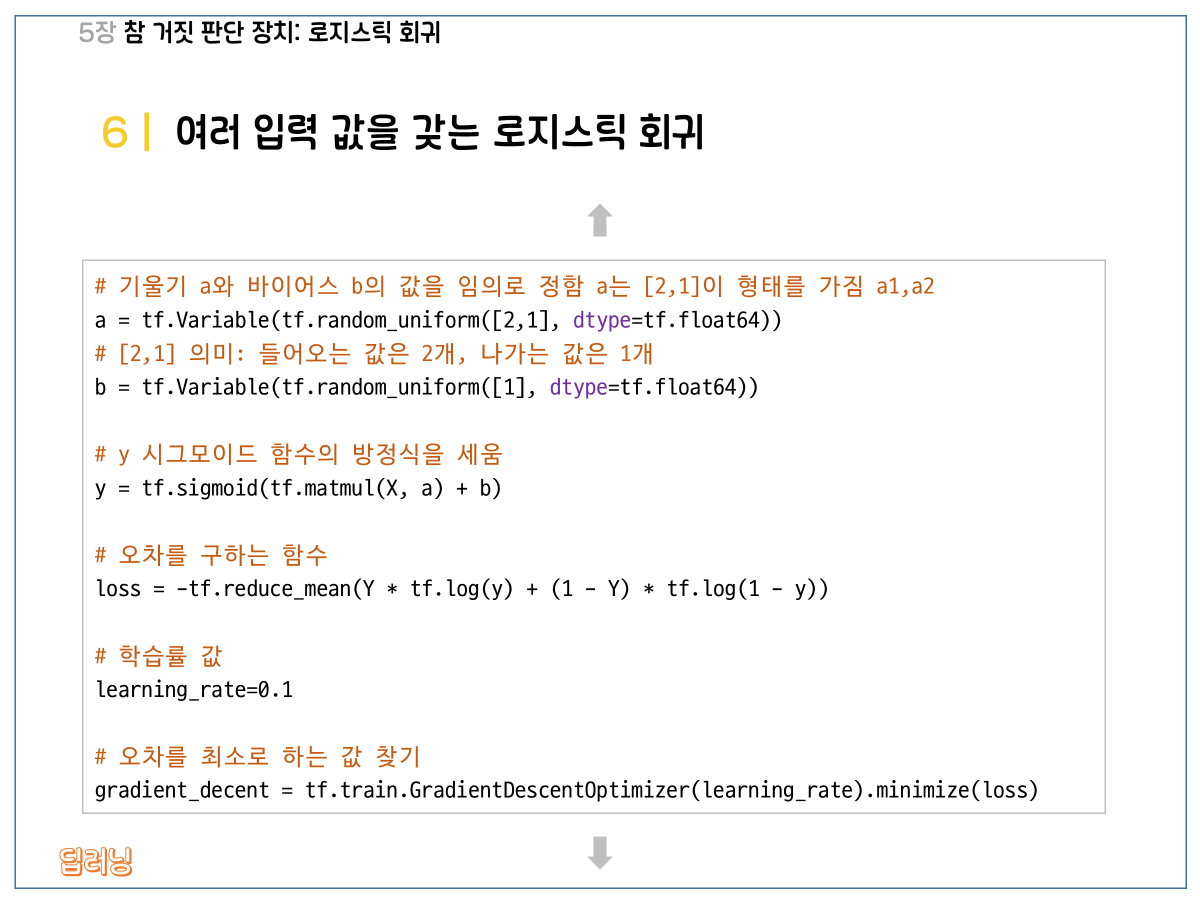

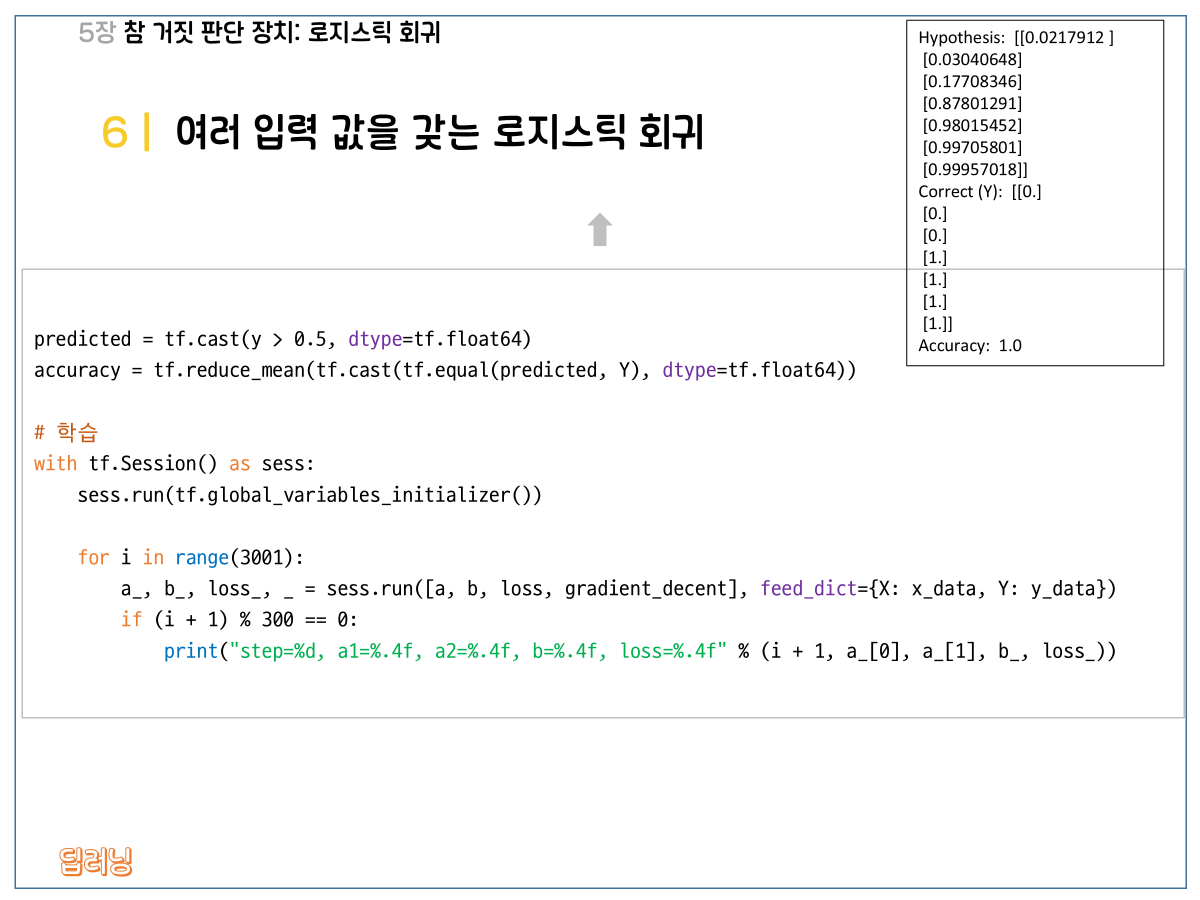

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np


seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

x_data = np.array([[2, 3], [4, 3], [6, 4], [8, 6], [10, 7], [12, 8], [14, 9]])
y_data = np.array([0, 0, 0, 1, 1, 1, 1]).reshape(7, 1)

X = tf.placeholder(tf.float64, shape=[None, 2])
Y = tf.placeholder(tf.float64, shape=[None, 1])


a = tf.Variable(tf.random_uniform([2, 1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64, seed=0))

y = tf.sigmoid(tf.matmul(X, a) + b)

loss = -tf.reduce_mean(Y * tf.log(y) + (1 - Y) * tf.log(1-y))

learning_rate = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float64))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3001):
        a_, b_, loss_, _ = sess.run([a, b, loss, gradient_decent], feed_dict={X:x_data, Y:y_data})
        if i % 300 == 0:
            print("Epoch : %.f, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f" % (i + 1, a_[0], a_[1], b_, loss_))

    print(f'predicted = {sess.run(predicted, feed_dict={X:x_data})}')
    p_val, h_val = sess.run([predicted, y], feed_dict={X:[[1, 5], [10, 5], [4, 5]]})
    print(f'check predicted = {p_val}')
    print(f'check hypothesis = {h_val}')
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    print("\nhypothesis : ", h, "\nCorrect (Y) : ", c, "\nAccuracy : ", a)

    new_x = np.array([7, 6]).reshape(1, 2)
    new_y, new_y_result = sess.run([y, predicted], feed_dict={X:new_x})

    print("공부한 시간 %d, 과외 수업 횟수 %d" % (new_x[:0], new_x[:1]))
    print("합격 가능성 %6.2f %%", % (new_y * 100))


<ipython-input-8-4984c44194ed>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Epoch : %.f, a1 = %.4f, a2 = %.4f, b = %.4f, loss = %.4f" % (i + 1, a_[0], a_[1], b_, loss_))


Epoch : 1, a1 = 0.0007, a2 = 0.3888, b = 0.1189, loss = 1.1192
Epoch : 301, a1 = 0.7406, a2 = -0.4077, b = -2.6560, loss = 0.2531
Epoch : 601, a1 = 0.7570, a2 = -0.1680, b = -4.0729, loss = 0.1831
Epoch : 901, a1 = 0.6809, a2 = 0.1341, b = -5.1032, loss = 0.1443
Epoch : 1201, a1 = 0.5881, a2 = 0.4212, b = -5.9219, loss = 0.1188
Epoch : 1501, a1 = 0.4976, a2 = 0.6796, b = -6.6034, loss = 0.1007
Epoch : 1801, a1 = 0.4146, a2 = 0.9092, b = -7.1878, loss = 0.0873
Epoch : 2101, a1 = 0.3401, a2 = 1.1131, b = -7.6996, loss = 0.0770
Epoch : 2401, a1 = 0.2736, a2 = 1.2949, b = -8.1550, loss = 0.0688
Epoch : 2701, a1 = 0.2144, a2 = 1.4580, b = -8.5653, loss = 0.0622
Epoch : 3001, a1 = 0.1615, a2 = 1.6053, b = -8.9388, loss = 0.0567
predicted = [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted = [[0.]
 [1.]
 [0.]]
check hypothesis = [[0.32060376]
 [0.66866491]
 [0.43373835]]

hypothesis :  [[0.02187995]
 [0.02996974]
 [0.17523733]
 [0.87915925]
 [0.98040473]
 [0.99710209]
 [0.99957756]] 

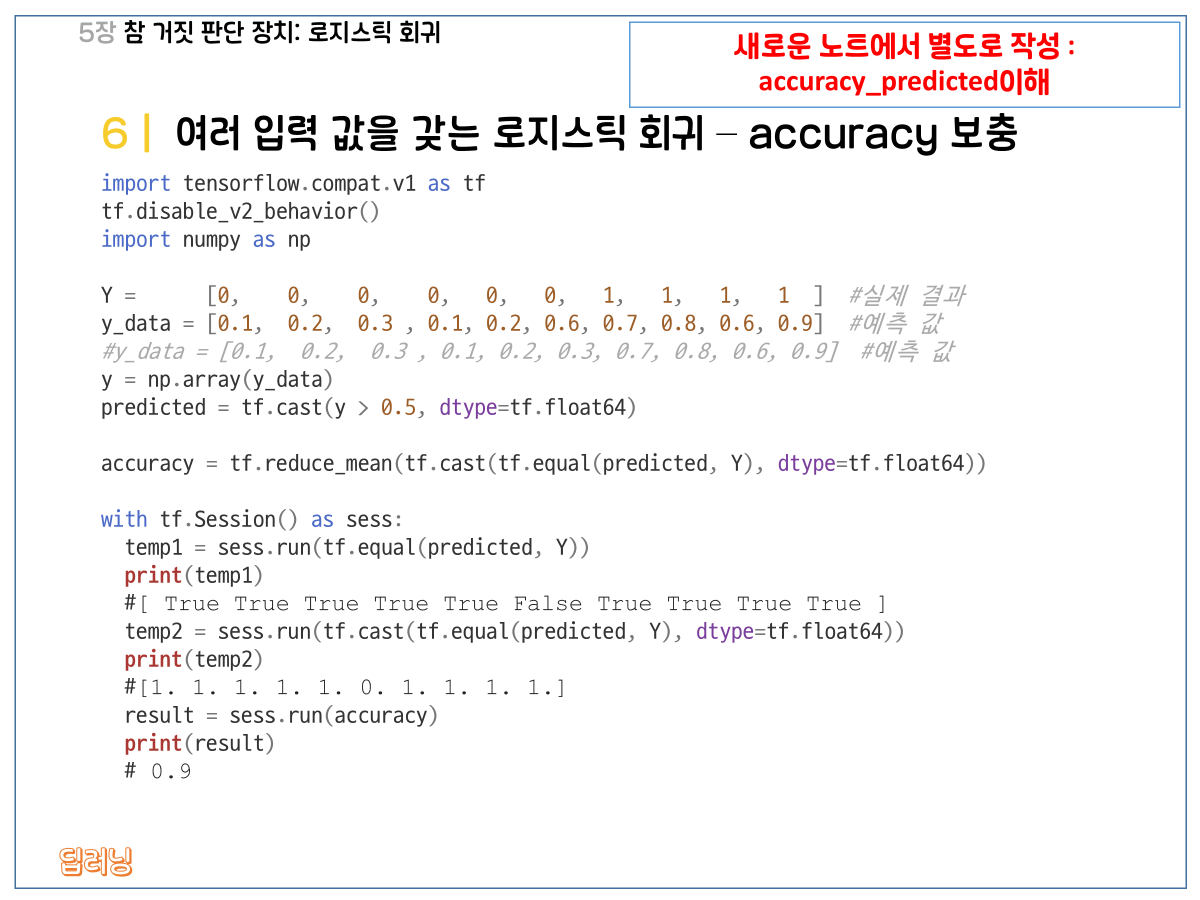

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Y = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
y_data = [0.1, 0.2, 0.3, 0.1, 0.2, 0.6, 0.7, 0.8, 0.6, 0.9]
y = np.array(y_data)

predicted = tf.cast(y > 0.5, dtype=tf.float64)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))

with tf.Session() as sess:
    temp1 = sess.run(tf.equal(predicted, Y))
    print(temp1)

    temp2 = sess.run(tf.cast(tf.equal(predicted, Y), dtype=tf.float64))
    print(temp2)

    result = sess.run(accuracy)
    print(result)

[ True  True  True  True  True False  True  True  True  True]
[1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
0.9


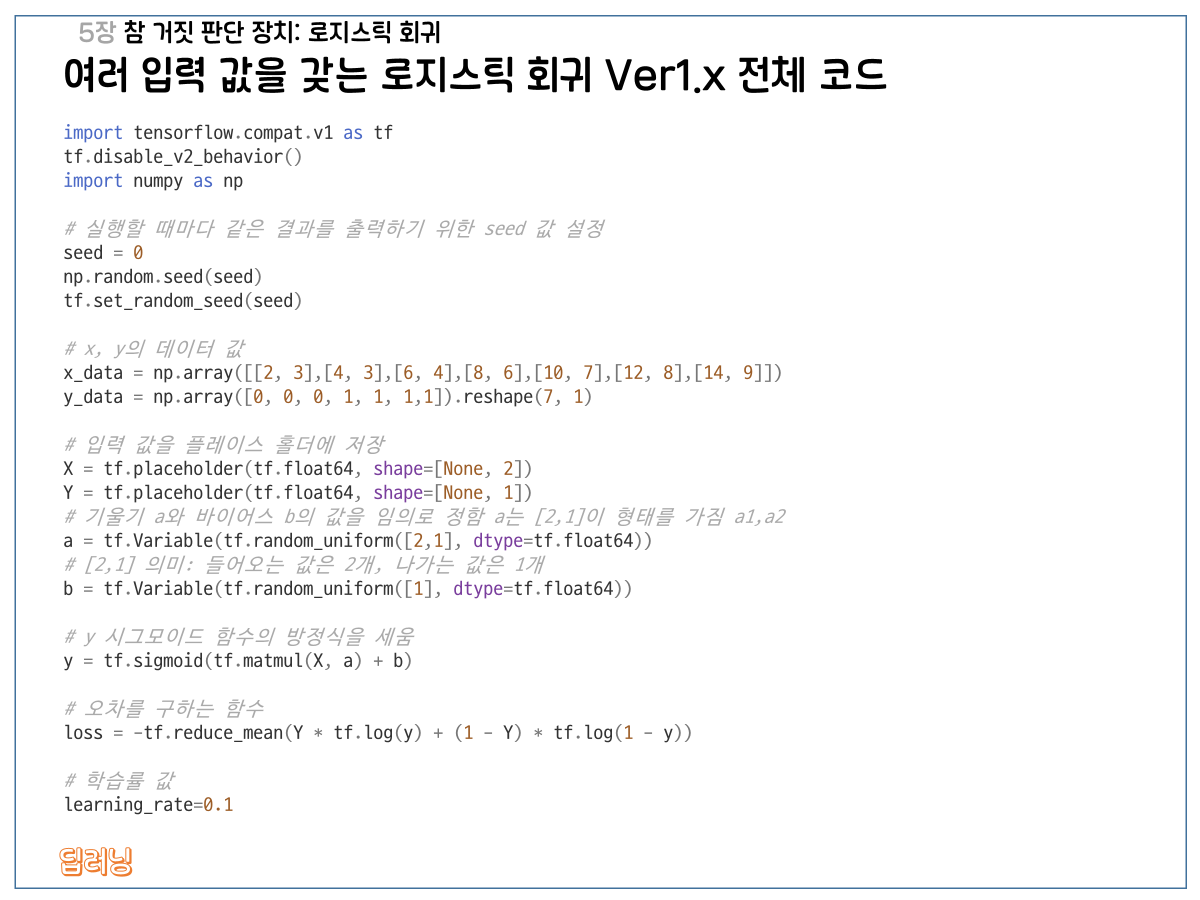

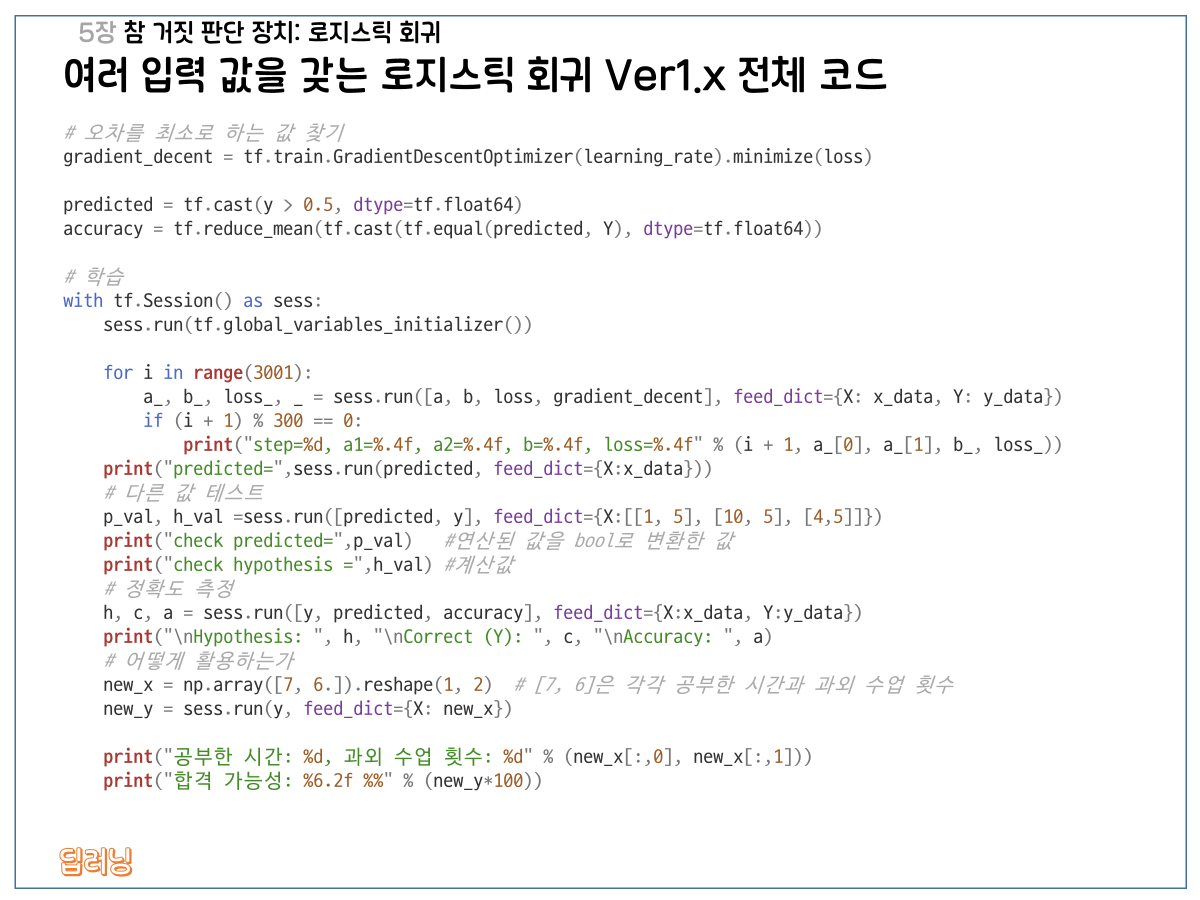

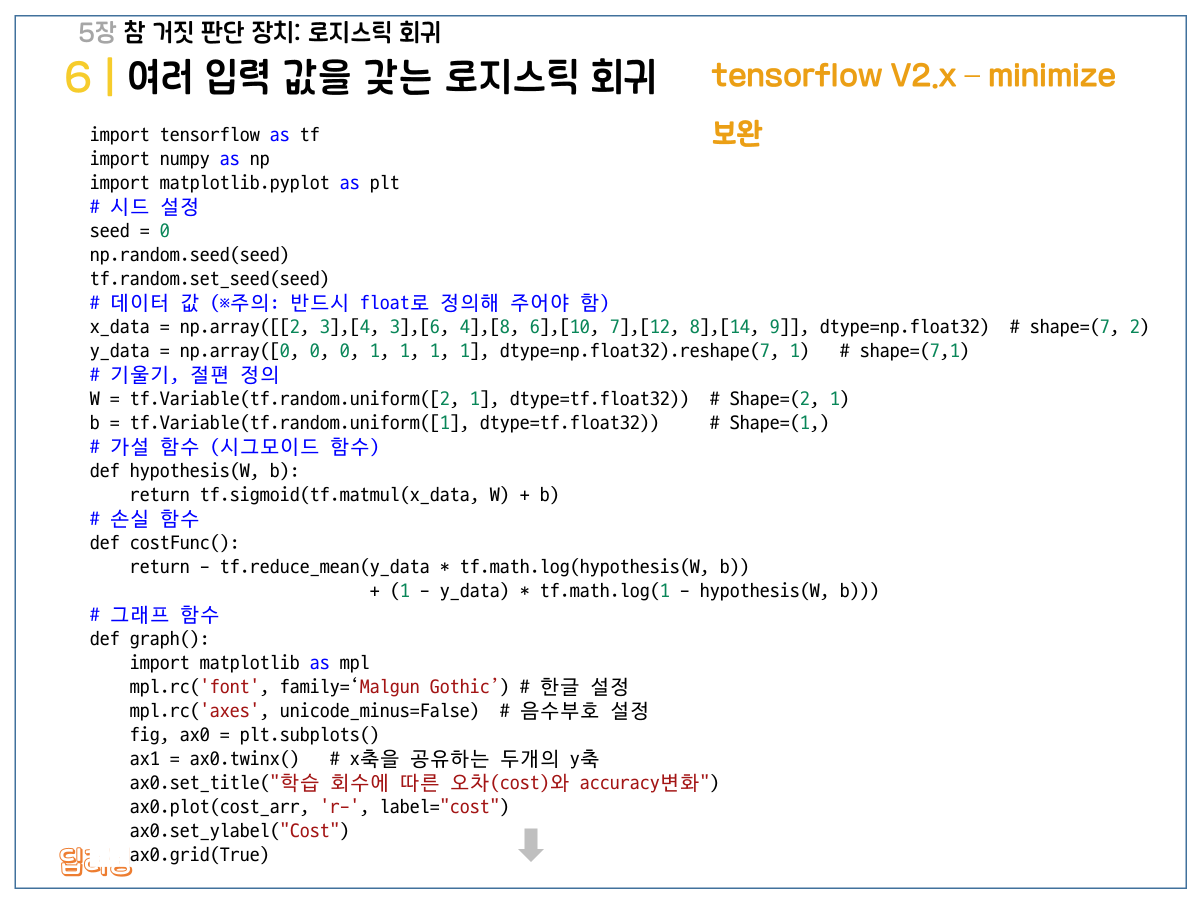

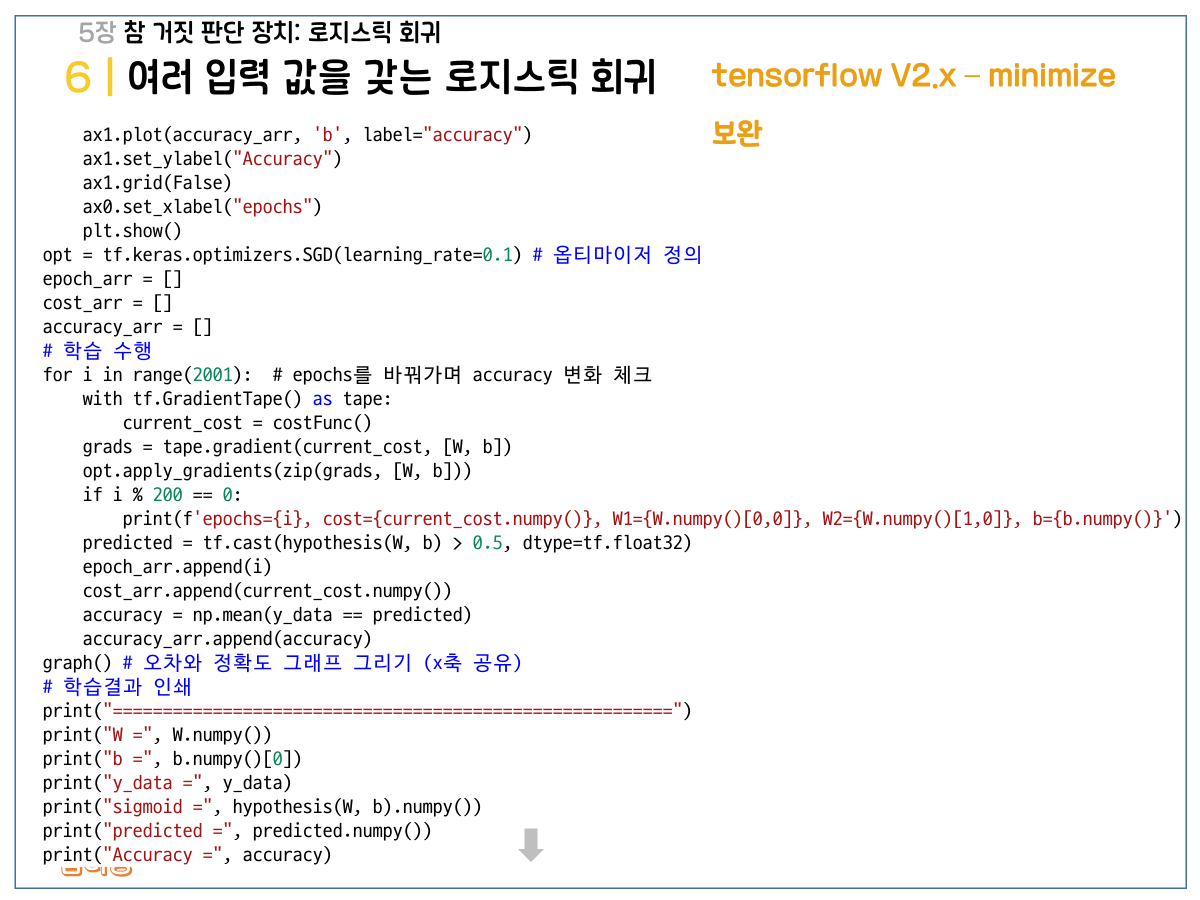

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

x_data = np.array([[2, 3], [4, 3], [6, 4], [8, 6], [10, 7], [12, 8], [14, 9]], dtype=np.float32)
y_data = np.array([0, 0, 0, 1, 1, 1, 1]).reshape(7, 1)

W = tf.Variable(tf.random_uniform([2, 1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], dtype=tf.float64, seed=0))

def hypothesis(W, b):
    return tf.sigmoid(tf.matmul(x_data, W) + b)

def costFunc(W, b):
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(W, b)) + (1 - y_data) * tf.math.log(1 - hypothesis(W, b)))

def graph():
    import matplotlib as mpl
    mpl.rc('axes', unicode_minus=False)
    fig, ax0 = plt.subplot()
    ax1 = ax0.twinx()
    ax0.plot(cost_arr, 'r-', label='cost')
    ax0.set_ylabel("Cost")
    ax0.grid(True)

    ax1.plot(accuracy_arr, 'b', lable='accuracy')
    ax1.set_ylabel("Accuracy")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

opt = tf.keras.optimizers.SGD(learning_rate = 0.1)
epoch_arr = []
cost_arr = []
accuracy_arr = []
for i in range(2001):
    with tf.GradientTape() as tape:
        current_cost = costFunc()
    grads = tape.gradient(current_cost, [W, b])
    opt.apply_gradients(zip(grads, [W, b]))
    if i % 200 == 0:
        print(f'epoch : {i}, cost = {current_cost.numpy()}, W1 = {W.numpy()[0,0]}, W2 = {W.numpy()[1,0]}, b = {b.numpy()}')
    predicted = tf.cast(hypothesis(W, b) > 0.5, dtype = tf.float32)
    epoch_arr.append(i)
    cost_arr.append(current_cost.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)
graph()

print("===============")
print('W = ', W.numpy())
print('b = ', b.numpy())
print('y_data = ', y_data)
print('sigmoid = ', hypothesis(W, b).numpy())
print('predicted = ', predicted.numpy())
print('Accuracy = ', accuracy)

